# Modelos de 1, 3 y 5 factores 

Fuente :  https://www.pwlcapital.com/wp-content/uploads/2020/12/Five-Factor-Investing-with-ETFs.pdf%20z

## 5 factor model

$$Stock = \sum_{t=1} \frac{E(d_{t+1})}{(1+r)^t}$$


*Miller Modigliani Proposition*

Los dividendos no importan, en realidad son solo dinero que tiene la empresa. De las ganancias vienen las inversiones en equipo, etc. 

$$E(d_{t+1}) = E(Profits_{t+1} - dB_{t+1}) $$


Juntando todo
$$Stock = \sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}$$

Escalando por el valor en libros:

$$\frac{Stock}{B_t} = \frac{\sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}}{B_t}$$


$r$ es lo que imorta


1- *Value premium*: 1- Si dejamos todo constante, excepto $r$ y $\frac{stock}{B_t}$ significa que empresas con precio bajo necesariamente tienen mejor $r$

2-  *Profitability premium*: Si dejamos todo constante excepto $Profits_{t+1}$  y $r$ significa que las empresas que ganan más deben tener mejor $r$

3- *Investment premium* Si dejamos todo constante excepto $dB_{t+1}$ y $r$ entonces las compañias que gastan menos, tienen un mayor $r$


Instalar paquete

In [3]:
# Descargar factores

import pandas_datareader.data as web
import datetime
from sklearn.metrics import r2_score
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Definir las fechas de inicio y fin
start_date = datetime.datetime(1980, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Descargar los factores Fama-French desde la web de Ken French
ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)

#ff_factores.head()

In [4]:
factors_df = ff_factores[0] / 100
factors_df.index = factors_df.index.to_timestamp()
factors_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1980-01-01,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0080
1980-02-01,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0089
1980-03-01,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,0.0121
1980-04-01,0.0397,0.0105,0.0106,-0.0210,0.0029,0.0126
1980-05-01,0.0526,0.0211,0.0038,0.0034,-0.0031,0.0081


In [6]:
#  Anualizados
factors_df.mean() * 12

Mkt-RF    0.084420
SMB       0.010577
HML       0.026720
RMW       0.046257
CMA       0.031368
RF        0.039264
dtype: float64

In [4]:
# Porcentaje de veces p
np.mean(factors_df.RMW > 0)

In [8]:
# Escalar y transformar factores
(factors_df['Mkt-RF'] > 0).mean()

0.6231060606060606

In [9]:
(factors_df['SMB'] > 0).mean()

0.4981060606060606

In [10]:
(factors_df['HML'] > 0).mean()

0.5151515151515151

In [11]:
# Descargar acciones
tickers = ['BRK-A', 'SPY', 'VB', 'VGT',
          'AAPL', 'AMZN', 'MSFT', 'WMT']
stock_data = yf.download(tickers, start_date, end_date, interval='1mo')['Adj Close']
rt = stock_data.pct_change().dropna()

[*********************100%%**********************]  8 of 8 completed


In [12]:
# Ejemplo merge
df1 = pd.DataFrame({
    'id': ['1A', '5B', '7B','54'],
    'rendimiento': [12, 1000, 50, 30]
})

df2 = pd.DataFrame({
    'id': ['1A', '5B', '7B','54'],
    'rendimiento': [12, 120, 50, 30]
})

In [13]:
df1

,id,rendimiento
0,1A,12
1,5B,1000
2,7B,50
3,54,30


In [14]:
df2

,id,rendimiento
0,1A,12
1,5B,120
2,7B,50
3,54,30


In [19]:
df3 = pd.merge(df1, df2, on='id')
df3

,id,rendimiento_x,rendimiento_y
0,1A,12,12
1,5B,1000,120
2,7B,50,50
3,54,30,30


In [20]:
# Juntar datos en Date
fama_french_df = pd.merge(rt, factors_df, on='Date')

### Crea el CAPM con el S&P500, ¿Qué concluyes?




In [24]:
X = fama_french_df[['Mkt-RF']]
y = fama_french_df['SPY'] - fama_french_df['RF']

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_true=y, y_pred=predictions)

0.9795754195873254

# Ahora con Berkshiere

In [25]:
# Accion minus RF 
X = fama_french_df[['BRK-A']]
y = fama_french_df['SPY'] - fama_french_df['RF']

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_true=y, y_pred=predictions)


0.3650992255971841

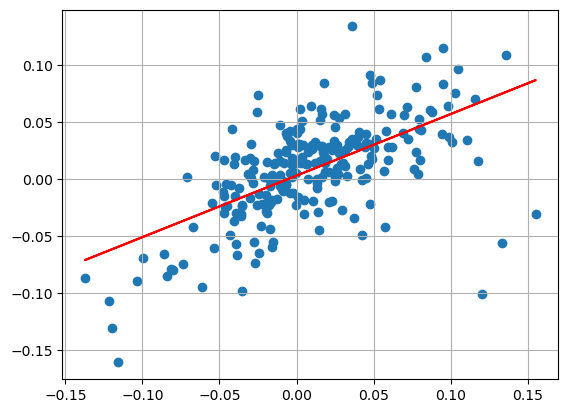

In [26]:
plt.scatter(X,y)
plt.plot(X, predictions, c = 'red')
plt.grid()

## Fama french con Berkshiere

In [27]:
fama_french_df.keys()

Index(['AAPL', 'AMZN', 'BRK-A', 'MSFT', 'SPY', 'VB', 'VGT', 'WMT', 'Mkt-RF',
       'SMB', 'HML', 'RMW', 'CMA', 'RF'],
      dtype='object')

In [29]:
X = fama_french_df[['Mkt-RF']]
y = fama_french_df['BRK-A'] - fama_french_df['RF']

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_true=y, y_pred=predictions)

0.35688413427777976

In [30]:
# Fama french
X = fama_french_df[['Mkt-RF','SMB','HML']]
y = fama_french_df['BRK-A'] - fama_french_df['RF']

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_true=y, y_pred=predictions)

0.440680515679454

# 5 factor model con Berkshiere

In [31]:
X = fama_french_df[['Mkt-RF','SMB','HML','RMW','CMA']]
y = fama_french_df['BRK-A'] - fama_french_df['RF']

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_true=y, y_pred=predictions)

0.44167936419190357

In [32]:
# Correr todos los modelos
def run_all_models(data, ticker):
    flag_data = data.copy()
    flag_data[ticker + '_minus_RF'] = data[ticker] - data['RF']
    y = flag_data[[ticker + '_minus_RF']] 

    # CAPM 
    X_capm = flag_data[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = r2_score(y_pred=prediction_capm, y_true=y)
    summary_capm = {str(X_capm.keys().values): list(model_capm.coef_[0])}

    # 3 factor model 
    X_3factor = flag_data[['Mkt-RF', 'SMB', 'HML']]
    model_3factor = LinearRegression().fit(X_3factor, y)
    prediction_3factor = model_3factor.predict(X_3factor)
    r2_3factor = r2_score(y_pred=prediction_3factor, y_true=y)
    summary_3factor = {str(X_3factor.keys().values): list(model_3factor.coef_[0])}
    
    
    # 5 factor
    X_5factor = flag_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5factor = LinearRegression().fit(X_5factor, y)
    prediction_5factor = model_5factor.predict(X_5factor)
    r2_5factor = r2_score(y_pred=prediction_5factor, y_true=y)
    summary_5factor = {str(X_5factor.keys().values): list(model_5factor.coef_[0])}
    
    summary = {
        'CAPM': {'BETAS': summary_capm, 'R2': r2_capm},
        '3 factor': {'BETAS': summary_3factor, 'R2': r2_3factor},
        '5 factor': {'BETAS': summary_5factor, 'R2': r2_5factor}

    }
    return summary


In [35]:
# Todos los modelos
run_all_models(fama_french_df, 'AMZN')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.2111336838323317]},
  'R2': 0.25896354576284586},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.3434767078214442,
    0.004054097892029707,
    -1.2145754047253658]},
  'R2': 0.38812567295839706},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2878886037793489,
    -0.11819254404437413,
    -0.9694201746859544,
    -0.30396029797269825,
    -0.5767823191617114]},
  'R2': 0.39734868791624334}}

## Crea un portafolio con 50% apple y 50% amazon
¿Qué concluyes?

In [36]:
fama_french_df['port_50_50'] = 0.5 * fama_french_df['AAPL'] + 0.5 * fama_french_df['AMZN']

In [37]:
run_all_models(fama_french_df, 'port_50_50')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.2057880308359201]},
  'R2': 0.41535423249036485},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.3352366017563382,
    -0.12880393543306679,
    -0.9105522487162818]},
  'R2': 0.5410016313704692},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2977745616768068,
    -0.11874466070844397,
    -0.7258381770400051,
    0.13449421176089765,
    -0.5133564443483215]},
  'R2': 0.5502506842959071}}

## Crea un portafolio con (1/3) apple, (1/3) amazon 6(1/3) microsoft
¿Qué concluyes?


In [38]:
fama_french_df['port_33_33_33'] = (1/3) * fama_french_df['AAPL'] + (1/3) * fama_french_df['AMZN'] + (1/3) * fama_french_df['MSFT']

In [40]:
run_all_models(fama_french_df, 'port_33_33_33')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1101335501574336]},
  'R2': 0.5067627019646979},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.2511988388667075,
    -0.28840274606453753,
    -0.6828936437672202]},
  'R2': 0.6279523163360032},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2181315080679536,
    -0.29100125632267937,
    -0.5222694842066427,
    0.07658458728539921,
    -0.437657680410262]},
  'R2': 0.6372079196848089}}

In [41]:
run_all_models(fama_french_df, 'VGT')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1358848797477819]},
  'R2': 0.8284505117345342},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.1843895516585525,
    -0.025795345276381748,
    -0.3881388044199044]},
  'R2': 0.8778884031412277},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.1720840411925442,
    -0.052791111845878924,
    -0.3338550130763808,
    -0.06704559491724685,
    -0.127770883278319]},
  'R2': 0.879530696929228}}

In [42]:
run_all_models(fama_french_df, 'VB')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1873304615786653]},
  'R2': 0.8928365926997954},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.0376327232167635,
    0.6233031873110804,
    0.06169538250957721]},
  'R2': 0.9699076381313712},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.0311027612147434,
    0.6124087266104885,
    0.09122493042681798,
    -0.022983828578090115,
    -0.07242829421104642]},
  'R2': 0.9703389922920004}}